# Importing the Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data using pandas

In [74]:
df = pd.read_csv('sales_data_with_discounts.csv')

In [75]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


Here Volume, Avg Price, Total Sales value, Discount Rate(%), Discount Amount and Net Sales Value are numeric columns

In [77]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


Through describe function we get the mean, median(50%), std. deviation of the numeric columns

# Data Visulization

Incling all the numerical columns in single variable

In [40]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

Plotting boxplot for all numeric columns

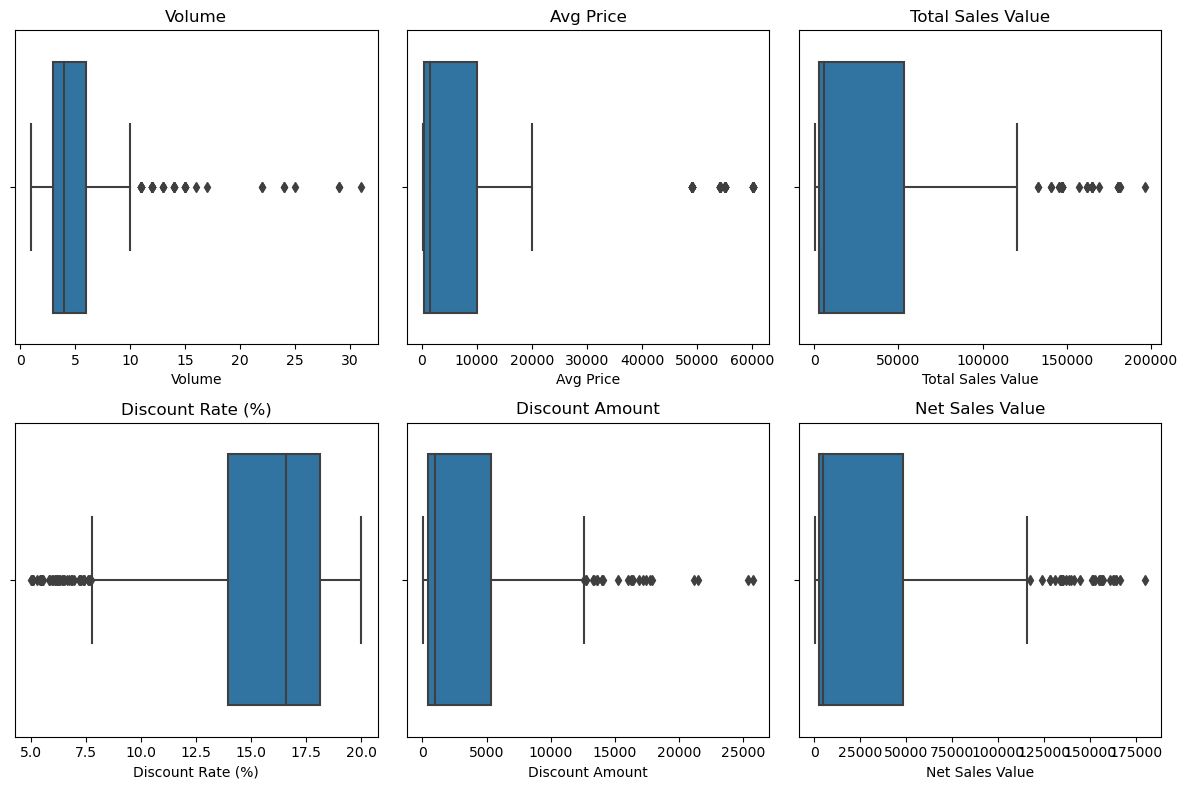

In [41]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols.columns):
    plt.subplot(2, len(numeric_cols.columns)//2, i+1)
    sns.boxplot(x=numeric_cols[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Doing same for histogram

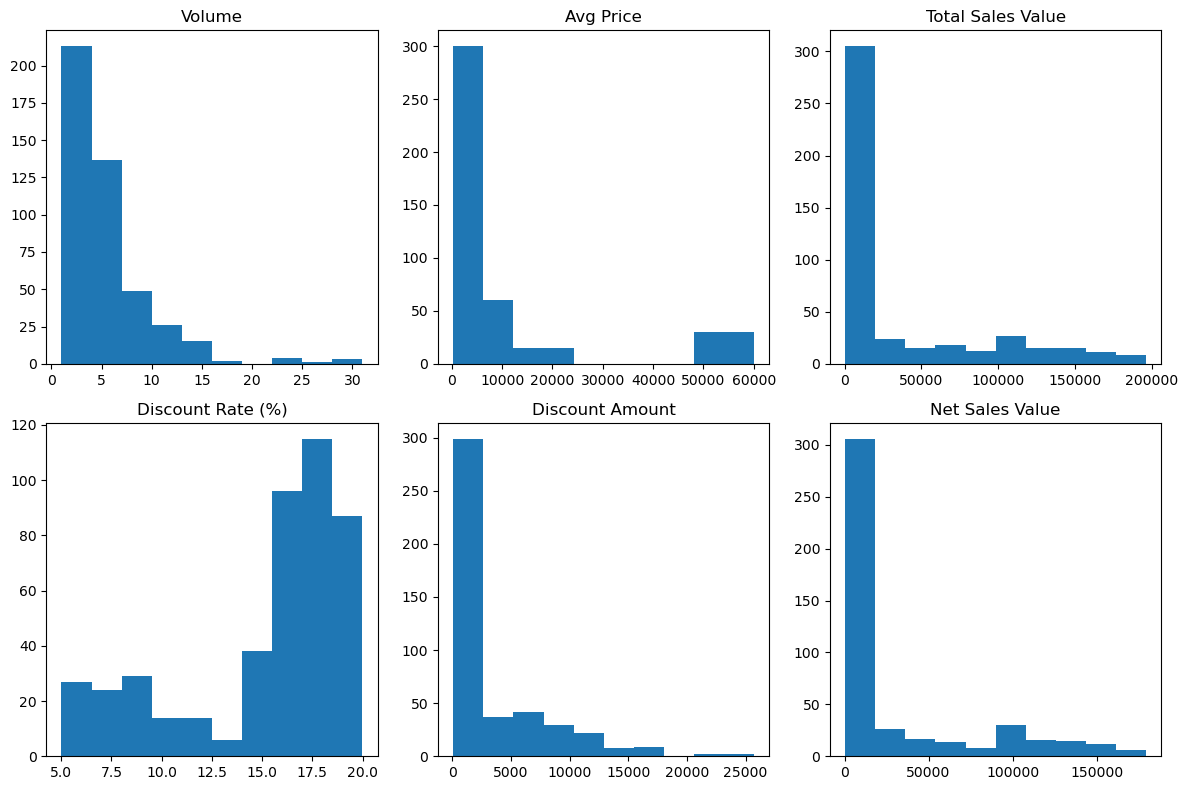

In [42]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols.columns):
    plt.subplot(2, len(numeric_cols.columns)//2, i+1)
    plt.hist(numeric_cols[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Plotting Total sale per day

C:\Users\Sunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


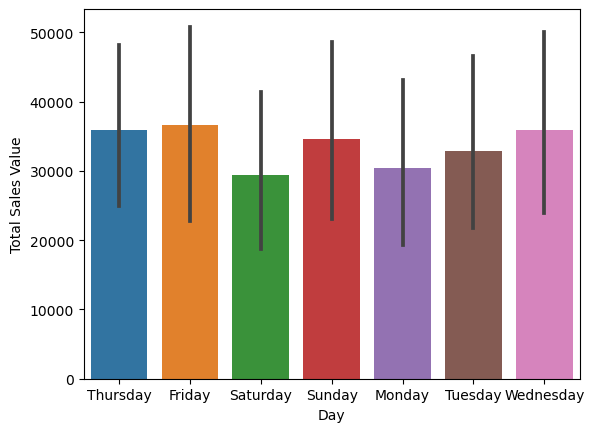

In [43]:
sns.barplot(df['Day'], df['Total Sales Value'])
plt.show()

## Plotting total sales of each brand

C:\Users\Sunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


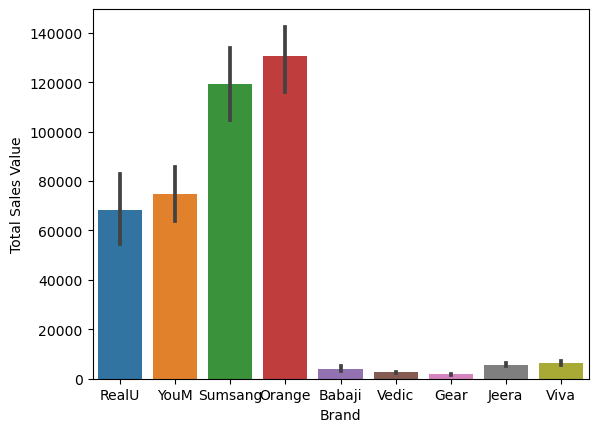

In [44]:
sns.barplot(df['Brand'], df['Total Sales Value'])
plt.show()

# Standarization of numerical columns

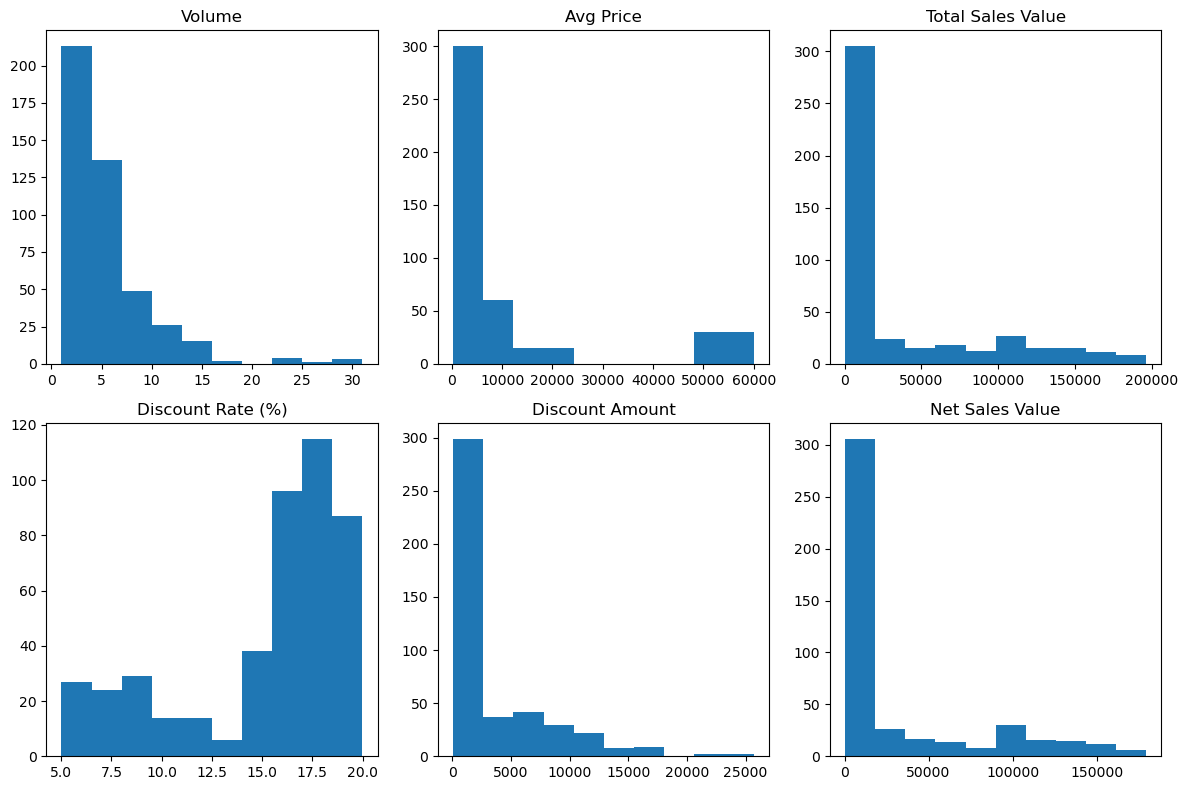

In [78]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols.columns):
    plt.subplot(2, len(numeric_cols.columns)//2, i+1)
    plt.hist(numeric_cols[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### For Volume column

In [79]:
df['Volume'] = np.log10(df['Volume'])

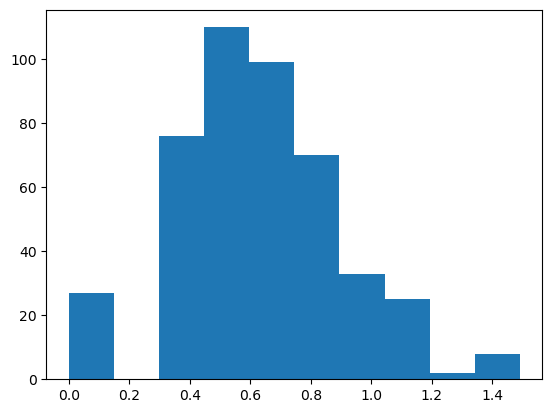

In [80]:
plt.hist(df['Volume'])
plt.show()

In [81]:
df['Avg Price'] = np.log10(df['Avg Price'])

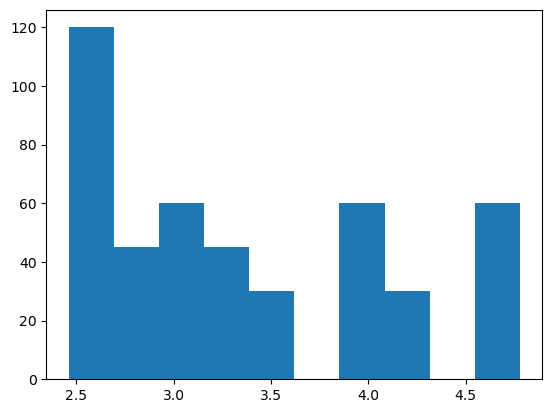

In [82]:
plt.hist(df['Avg Price'])
plt.show()

In [83]:
df['Avg Price'].skew()

0.5809700202010487

In [84]:
df['Total Sales Value'] = np.log10(df['Total Sales Value'])

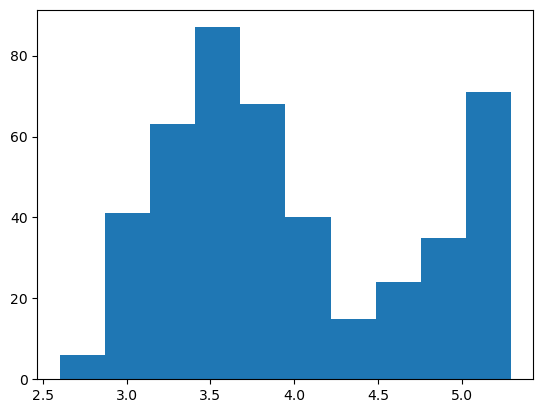

In [85]:
plt.hist(df['Total Sales Value'])
plt.show()

In [86]:
df['Total Sales Value'].skew()

0.40611256536755747

In [87]:
df['Discount Rate (%)'] = np.sqrt(df['Discount Rate (%)'])

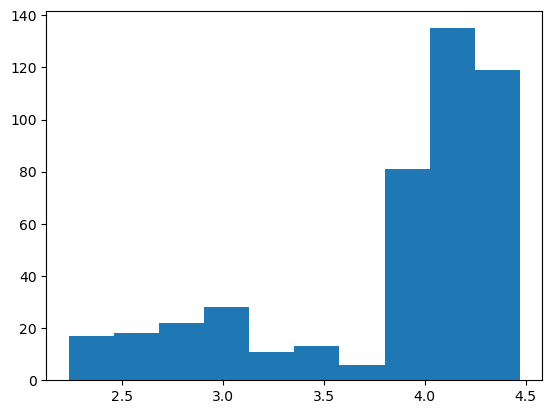

In [88]:
plt.hist(df['Discount Rate (%)'])
plt.show()

In [89]:
df['Discount Rate (%)'].skew()

-1.2443713837968042

In [90]:
df['Discount Amount'] = np.log(df['Discount Amount'])

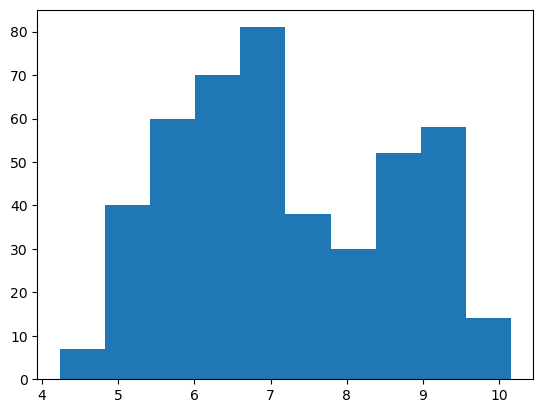

In [91]:
plt.hist(df['Discount Amount'])
plt.show()

In [92]:
df['Discount Amount'].skeww()

0.21210018152811735

In [93]:
df['Net Sales Value'] = np.log(df['Net Sales Value'])

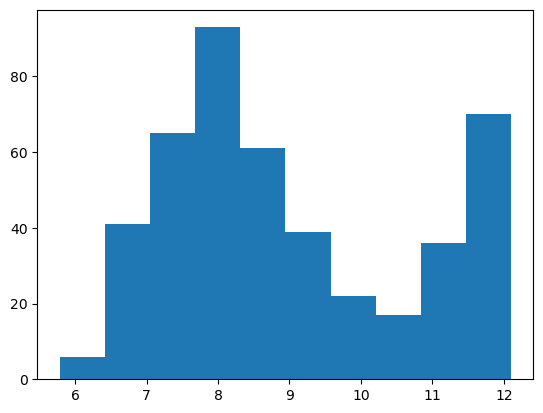

In [94]:
plt.hist(df['Net Sales Value'])
plt.show()

In [95]:
df['Net Sales Value'].skew()

0.43235043406889023

# Conversion of Categorical values in Dummy variable

In [96]:
data = pd.get_dummies(data=df, columns=['Day', 'SKU', 'City', 'BU', 'Brand', 'Model'])

In [97]:
data

,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,1.176091,4.082785,5.258877,3.413916,9.959561,11.985092,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01-04-2021,1.000000,4.004321,5.004321,3.400073,9.365300,11.400024,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01-04-2021,0.845098,4.206826,5.051924,3.075205,9.274058,11.533141,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,01-04-2021,0.778151,4.303196,5.081347,2.633512,9.031701,11.628358,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,01-04-2021,0.477121,3.908485,4.385606,4.242130,8.383192,9.899834,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,0.301030,3.113943,3.414973,3.933915,5.997367,7.695136,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,15-04-2021,0.778151,3.414973,4.193125,4.130015,7.886418,9.468009,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,15-04-2021,0.301030,3.204120,3.505150,4.354945,6.408360,7.860610,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,15-04-2021,0.477121,3.278754,3.755875,4.097928,6.864014,8.464383,0,0,0,...,0,0,0,0,0,0,0,0,0,0
